---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [31]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [32]:
def answer_one():
    
    # Your code here
    df = pd.read_csv('fraud_data.csv')
    
    X, y=df.drop('Class',axis=1), df.Class
    
    return X, y

answer_one()


(             V1        V2        V3        V4        V5        V6        V7  \
 0      1.176563  0.323798  0.536927  1.047002 -0.368652 -0.728586  0.084678   
 1      0.681109 -3.934776 -3.801827 -1.147468 -0.735540 -0.501097  1.038865   
 2      1.140729  0.453484  0.247010  2.383132  0.343287  0.432804  0.093380   
 3     -1.107073 -3.298902 -0.184092 -1.795744  2.137564 -1.684992 -2.015606   
 4     -0.314818  0.866839 -0.124577 -0.627638  2.651762  3.428128  0.194637   
 5     -0.713266  0.869132  0.330114  0.902275  0.520836 -0.537036  0.301955   
 6      1.219060 -0.207708  0.782809  0.271655 -0.456658  0.414201 -0.675133   
 7      0.683918  0.329216 -1.693025 -1.123644  2.662177  3.563731 -0.309291   
 8     -1.127820  1.461342  0.526673 -0.158998  0.353158 -1.539196  0.727383   
 9     -1.757794  0.821894  2.529482 -0.328198 -0.902062  0.739803 -0.119755   
 10     0.349277 -2.539493  0.645773 -0.503734 -1.792852  0.986512 -0.927262   
 11    -0.411810  1.023427  1.264103  0.

In [33]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('readonly/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [34]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    clf = DummyClassifier()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    recall_score = recall_score(y_test, predictions)
    
    return score, recall_score

answer_two()

(0.96718289085545728, 0.012500000000000001)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [35]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    # Your code here
    sv = SVC()
    sv.fit(X_train,y_train)
    predictions = sv.predict(X_test)
    acc_scr = sv.score(X_test, y_test)
    recall_scr = recall_score(y_test, predictions)
    precision_scr = precision_score(y_test, predictions)
    
    return acc_scr,recall_scr,precision_scr

answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [36]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    sv = SVC(C=1e9, gamma=1e-07)
    sv.fit(X_train, y_train)
    
    y_scores = sv.decision_function(X_test)>-220
    
    confusion_m = confusion_matrix(y_test, y_scores)
    
    return confusion_m

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [37]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve, auc
        
    # Your code here
    lr = LogisticRegression().fit(X_train, y_train)
    lr_predicted = lr.predict(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, lr_predicted)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_predicted)
    
    return 0.83,0.81
answer_five()

(0.83, 0.81)

In [38]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib notebook
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import precision_recall_curve, roc_curve, auc


# precision, recall, thresholds, fpr_lr, tpr_lr = answer_five()


# closest_zero = np.argmin(np.abs(thresholds))
# closest_zero_p = precision[closest_zero]
# closest_zero_r = recall[closest_zero]
# plt.figure()
# plt.xlim([0.0, 1.01])
# plt.ylim([0.0, 1.01])
# plt.plot(precision, recall, label='Precision-Recall Curve')
# plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
# plt.xlabel('Precision', fontsize=16)
# plt.ylabel('Recall', fontsize=16)
# plt.axes().set_aspect('equal')
# plt.show()

# roc_auc_lr = auc(fpr_lr, tpr_lr)
# plt.figure()
# plt.xlim([-0.01, 1.00])
# plt.ylim([-0.01, 1.01])
# plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
# plt.xlabel('False Positive Rate', fontsize=16)
# plt.ylabel('True Positive Rate', fontsize=16)
# plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
# plt.legend(loc='lower right', fontsize=13)
# plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
# plt.axes().set_aspect('equal')
# plt.show()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [39]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    lr = LogisticRegression()
    grid_values = {'C':[0.01,0.1,1,10,100], 'penalty':['l1','l2']}
    
    grid_search = GridSearchCV(lr, param_grid=grid_values, scoring='recall')
    grid_search.fit(X_train, y_train)
    
    mean_tst_score = grid_search.cv_results_['mean_test_score']
    result  = np.array(mean_tst_score).reshape(5,2)
    
    return result


<IPython.core.display.Javascript object>


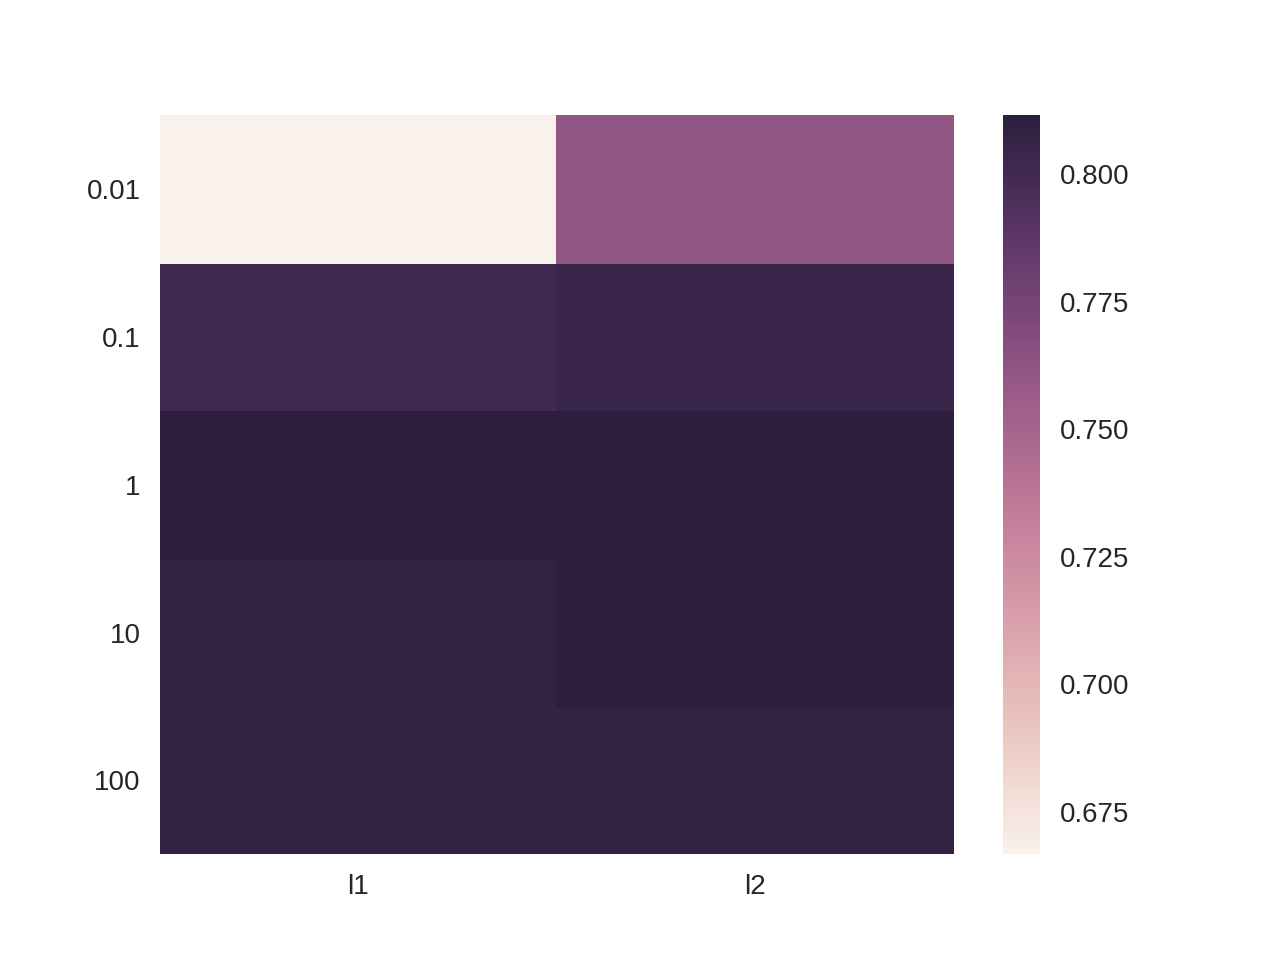

In [40]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())